<h3>Importing Library and Loading Data</h3>

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import math

In [2]:
df_train= pd.read_csv('train_aWnotuB.csv')
df_test= pd.read_csv('test_BdBKkAj_L87Nc3S.csv')

<h3>Having a look at the sample set of data</h3>

In [3]:
df_train.sample(5)

,DateTime,Junction,Vehicles,ID
29956,2015-12-03 04:00:00,3,3,20151203043
4402,2016-05-02 10:00:00,1,33,20160502101
29045,2017-06-25 05:00:00,2,11,20170625052
1252,2015-12-23 04:00:00,1,15,20151223041
22938,2016-10-13 18:00:00,2,21,20161013182


In [4]:
df_test.sample(5)

,DateTime,Junction,ID
4437,2017-08-31 21:00:00,2,20170831212
1846,2017-09-15 22:00:00,1,20170915221
10153,2017-08-24 01:00:00,4,20170824014
387,2017-07-17 03:00:00,1,20170717031
8204,2017-10-04 20:00:00,3,20171004203


<h3>Having a look at the amount of missing data</h3>

In [5]:
df_train.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [6]:
df_test.isnull().sum()

DateTime    0
Junction    0
ID          0
dtype: int64

<h3>Parsing Date</h3>

In [7]:
df_train['DateTime']= pd.to_datetime(df_train['DateTime'], format = "%Y-%m-%d %H:%M:%S")
df_test['DateTime']= pd.to_datetime(df_test['DateTime'], format = "%Y-%m-%d %H:%M:%S")

<h3>Feature Engineering</h3>

In [8]:
df_train['Year']= pd.to_datetime(df_train['DateTime']).dt.year
df_train['Month']= pd.to_datetime(df_train['DateTime']).dt.month
df_train['Day']= pd.to_datetime(df_train['DateTime']).dt.day
df_train['DayOfWeek']= pd.to_datetime(df_train['DateTime']).dt.dayofweek
df_train['Hour']= pd.to_datetime(df_train['DateTime']).dt.hour

In [9]:
df_train.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Day,DayOfWeek,Hour
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,6,0
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,6,1
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,6,2
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,6,3
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,6,4


<h3>Exploratory Data Analysis</h3>

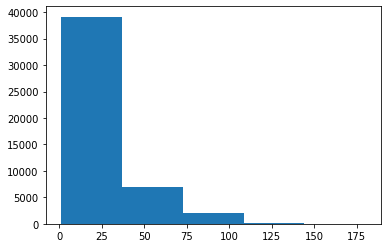

In [10]:
vehicles = df_train.Vehicles

plt.hist(vehicles, bins=5)
plt.show()

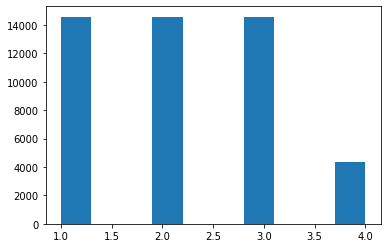

In [11]:
junction = df_train.Junction

plt.hist(junction)
plt.show()

In [12]:
df_train['Junction'].unique()

array([1, 2, 3, 4], dtype=int64)

In [13]:
dfJunction= df_train[['Junction', 'Vehicles']].groupby(['Junction']).sum().reset_index()
dfYear= df_train[['Year', 'Vehicles']].groupby(['Year']).sum().reset_index()
dfMonth= df_train[['Month', 'Vehicles']].groupby(['Month']).sum().reset_index()
dfDay= df_train[['Day', 'Vehicles']].groupby(['Day']).sum().reset_index()
dfDayofWeek= df_train[['DayOfWeek', 'Vehicles']].groupby(['DayOfWeek']).sum().reset_index()
dfHour= df_train[['Hour', 'Vehicles']].groupby(['Hour']).sum().reset_index()

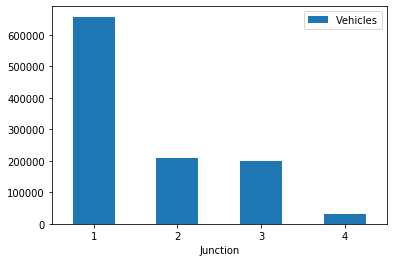

In [14]:
dfJunction.plot.bar(x='Junction', y='Vehicles', rot=0)

We have equal number of records for Junction 1, 2 and 3 and relatively lower number of records for Junction 4.
From the graph above it can be observed that there are more vehicle son Junction 1 than Junction 2 and 3. There are equal number of vehicles on unction 2 and 3 at any given time. 

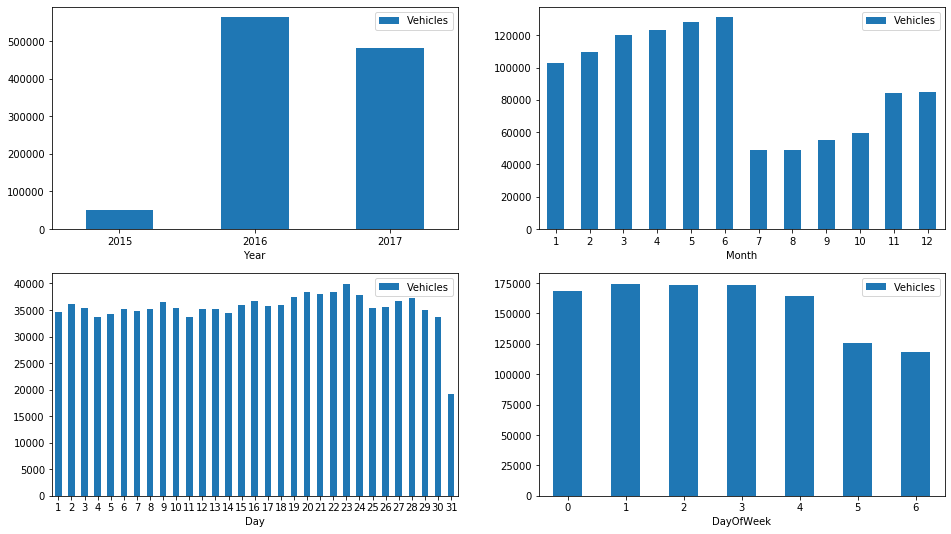

In [15]:
fig, axes = plt.subplots(figsize=(16,9),nrows=2, ncols=2)
dfYear.plot.bar(x='Year', y='Vehicles', rot=0, ax=axes[0,0])
dfMonth.plot.bar(x='Month', y='Vehicles', rot=0, ax=axes[0,1])
dfDay.plot.bar(x='Day', y='Vehicles', rot=0, ax=axes[1,0])
dfDayofWeek.plot.bar(x='DayOfWeek', y='Vehicles', rot=0, ax=axes[1,1])

1) We have data for only certain months for the year 2015 and 2017. One key observations is the the increase in amount vehicles in the year 2017. We only have half the data for 2017 and it still waual to the number of the vehicles in the whole year of 2017. The Year does not add much significance to the analysis. However we have to account for an increase in number of vehicles as it could be slightly oberved that the number of vehicles increased in 2017 

2) For 2015 and 2017, we have data available for the months of November - December and January- June respectively. Duw to the limited number of available data, we cannot make a strong prediction based on the month itself.

3) The days also do not provide a much comprehensive analysis. The number of vehicles on most days are relatively the same.

4) There can be an interesting pattern that can be observed from the days of the week. From Mondays to Fridays there are relatively higher number of vehicles on the junction than on the weekends.

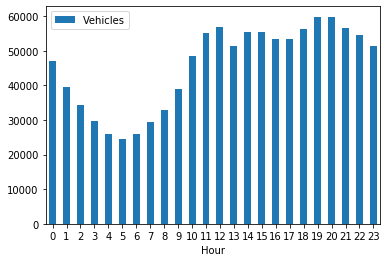

In [16]:
dfHour.plot.bar(x='Hour', y='Vehicles', rot=0)

It can be noticed that the number of vehicles early in the morning is quite low as compared to the other hours 

In [17]:
df_test['Day']= pd.to_datetime(df_test['DateTime']).dt.day
df_test['DayOfWeek']= pd.to_datetime(df_test['DateTime']).dt.dayofweek
df_test['Hour']= pd.to_datetime(df_test['DateTime']).dt.hour

<h3>Creating Validation Data</h3>

In [18]:
beforeJuly= df_train['DateTime']< pd.to_datetime('2016-07-01 00:00:00', format = "%Y-%m-%d %H:%M:%S") 
dfValidationTrain= df_train[beforeJuly]

afterJuly= df_train['DateTime']> pd.to_datetime('2016-06-30 23:00:00', format = "%Y-%m-%d %H:%M:%S")
beforeNovember= df_train['DateTime']< pd.to_datetime('2016-11-01 00:00:00', format = "%Y-%m-%d %H:%M:%S")
dfValidationTest= df_train[afterJuly & beforeNovember]

<h3>Dropping Columns</h3>

In [19]:
dfValidationTrain= dfValidationTrain.drop(columns={'Year', 'Month', 'ID'},axis=1)
dfValidationTest= dfValidationTest.drop(columns={'Year', 'Month', 'ID'},axis=1)
df_train= df_train.drop(columns={'Year', 'Month', 'ID'},axis=1)
df_test= df_test.drop(columns={'ID'},axis=1)

<h3>Encoding Categorical Variable</h3>

In [20]:
for col in ['Junction']:
    dfValidationTrain= pd.get_dummies(dfValidationTrain, columns=[col])
    dfValidationTest= pd.get_dummies(dfValidationTest, columns=[col])
    df_train = pd.get_dummies(df_train, columns=[col])
    df_test = pd.get_dummies(df_test, columns=[col])

In [21]:
def dateConversion(df):
    dateTime = []
    for date in df['DateTime']:
        dateTime.append(time.mktime(date.timetuple()))
    df['DateTime'] = dateTime
    return(df)

In [22]:
dfValidationTrain= dateConversion(dfValidationTrain)
dfValidationTest= dateConversion(dfValidationTest)
df_train= dateConversion(df_train)
df_test= dateConversion(df_test)

<h3>XGBRegressor</h3>

<h4>Validation</h4>

In [23]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [24]:
reg = XGBRegressor()

In [25]:
parameters = {'seed':[40, 45],
              'eta': [0.3, 0.5],
              'max_depth': [7, 8],
              'min_child_weight': [250, 300],
              'subsample': [0.7, 0.8],
              'colsample_bytree': [0.8, 0.9],
              'n_estimators': [200, 300]}

In [26]:
xgb_grid = GridSearchCV(reg,
                        parameters,
                        cv = 2,
                        n_jobs = 2,
                        verbose=True)

In [27]:
xgb_grid.fit(dfValidationTrain.drop(columns={'Vehicles'},axis=1), np.log1p(dfValidationTrain['Vehicles'])) 

Fitting 2 folds for each of 128 candidates, totalling 256 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  8.9min
[Parallel(n_jobs=2)]: Done 256 out of 256 | elapsed: 11.4min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='warn', n_jobs=2,
             param_grid={'colsample_bytree': [0.8, 0.9], 'eta': [0.3

In [28]:
y_pred= np.expm1(xgb_grid.predict(dfValidationTest.drop(columns={'Vehicles'},axis=1)))

Text(0, 0.5, 'Vehicles')

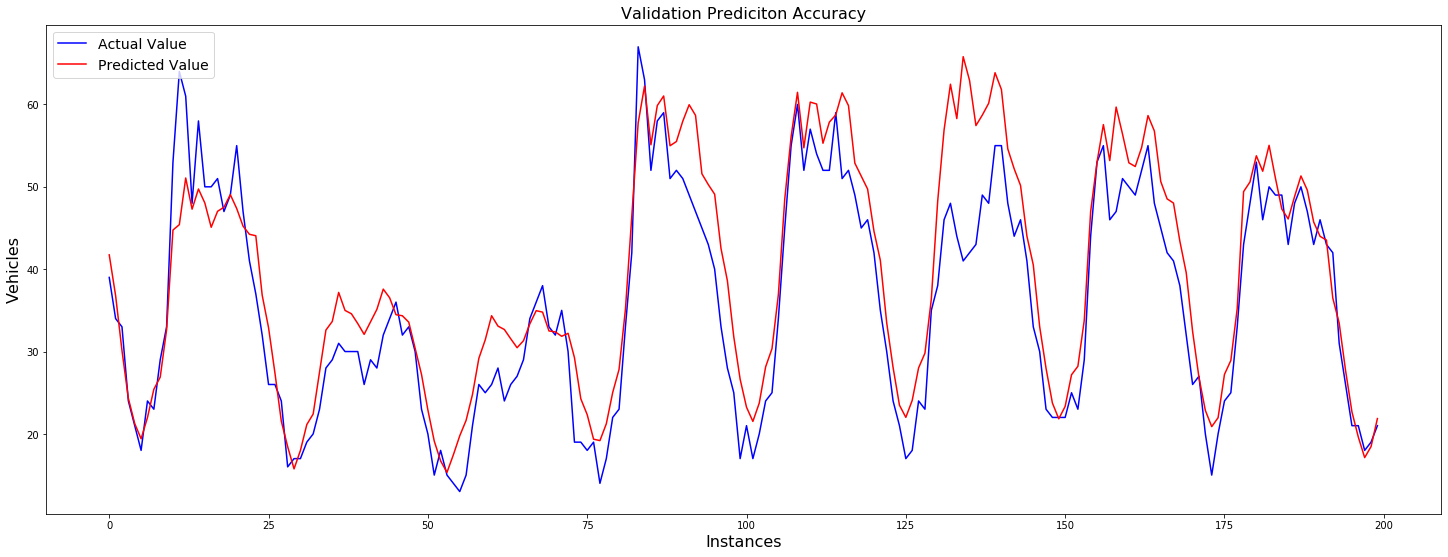

In [29]:
x_axis= list(range(0, 200, 1))
plt.figure(figsize=(25,9))
plt.title("Validation Prediciton Accuracy", fontsize=16)
plt.plot(x_axis, dfValidationTest['Vehicles'][:200], 'b-', label="Actual Value")
plt.plot(x_axis, y_pred[:200], 'r-', label="Predicted Value")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel('Instances', fontsize=16)
plt.ylabel('Vehicles', fontsize=16)

<h4>Test</h4>

In [30]:
xgb_grid.fit(df_train.drop(columns={'Vehicles'},axis=1), np.log1p(df_train['Vehicles']))

Fitting 2 folds for each of 128 candidates, totalling 256 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  5.4min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 25.6min
[Parallel(n_jobs=2)]: Done 256 out of 256 | elapsed: 34.3min finished


GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='warn', n_jobs=2,
             param_grid={'colsample_bytree': [0.8, 0.9], 'eta': [0.3

In [31]:
y_pred= np.round(np.expm1(xgb_grid.predict(df_test)))

In [32]:
df_test['Vehicles']= y_pred
df_test.head()

,DateTime,Day,DayOfWeek,Hour,Junction_1,Junction_2,Junction_3,Junction_4,Vehicles
0,1.498882e+09,1,5,0,1,0,0,0,62.0
1,1.498885e+09,1,5,1,1,0,0,0,57.0
2,1.498889e+09,1,5,2,1,0,0,0,47.0
3,1.498892e+09,1,5,3,1,0,0,0,38.0
4,1.498896e+09,1,5,4,1,0,0,0,31.0
